In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import linear_model
import sklearn.datasets as toy_datasets
import yfinance as yf

In [2]:
data = yf.download(['AAPL', 'XOM'],'2021-01-01','2021-12-31')
data

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                  AAPL        XOM        AAPL        XOM        AAPL   
Date                                                                   
2021-01-04  127.679977  37.317039  129.410004  41.500000  133.610001   
2021-01-05  129.258591  39.115444  131.009995  43.500000  131.740005   
2021-01-06  124.907562  40.113564  126.599998  44.610001  131.050003   
2021-01-07  129.169800  40.428288  130.919998  44.959999  131.630005   
2021-01-08  130.284729  40.877895  132.050003  45.459999  132.630005   
...                ...        ...         ...        ...         ...   
2021-12-23  174.995621  58.243515  176.279999  61.020000  176.850006   
2021-12-27  179.016113  59.073929  180.330002  61.889999  180.419998   
2021-12-28  177.983688  58.883030  179.289993  61.689999  181.330002   
2021-12-29  178.073044  58.367607  179.380005  61.150002  180.630005   
2021-12-30  176.901642  58.023987  178.199997  60.790001  180.570007   

                              Low                   Open             \
                  XOM        AAPL        XOM        AAPL        XOM   
Date                                                                  
2021-01-04  42.250000  126.760002  41.000000  133.520004  41.450001   
2021-01-05  44.799999  128.429993  41.830002  128.889999  41.840000   
2021-01-06  45.099998  126.379997  43.700001  127.720001  44.410000   
2021-01-07  45.570000  127.860001  44.529999  128.360001  45.000000   
2021-01-08  45.820000  130.229996  44.950001  132.429993  45.200001   
...               ...         ...        ...         ...        ...   
2021-12-23  61.840000  175.270004  61.000000  175.850006  61.169998   
2021-12-27  61.950001  177.070007  60.419998  177.089996  60.930000   
2021-12-28  62.310001  178.529999  61.400002  180.160004  61.910000   
2021-12-29  61.599998  178.139999  60.919998  179.330002  61.480000   
2021-12-30  61.599998  178.089996  60.770000  179.470001  61.220001   

               Volume            
                 AAPL       XOM  
Date                             
2021-01-04  143301900  27764700  
2021-01-05   97664900  44035100  
2021-01-06  155088000  36484800  
2021-01-07  109578200  29528100  
2021-01-08  105158200  28628200  
...               ...       ...  
2021-12-23   68356600  13543300  
2021-12-27   74919600  12593700  
2021-12-28   79144300  12781000  
2021-12-29   62348900  12733600  
2021-12-30   59773000  11940300  

[251 rows x 12 columns]

In [3]:
data = data.dropna()
data


Adj Close                  Close                   High  \
                  AAPL        XOM        AAPL        XOM        AAPL   
Date                                                                   
2021-01-04  127.679977  37.317039  129.410004  41.500000  133.610001   
2021-01-05  129.258591  39.115444  131.009995  43.500000  131.740005   
2021-01-06  124.907562  40.113564  126.599998  44.610001  131.050003   
2021-01-07  129.169800  40.428288  130.919998  44.959999  131.630005   
2021-01-08  130.284729  40.877895  132.050003  45.459999  132.630005   
...                ...        ...         ...        ...         ...   
2021-12-23  174.995621  58.243515  176.279999  61.020000  176.850006   
2021-12-27  179.016113  59.073929  180.330002  61.889999  180.419998   
2021-12-28  177.983688  58.883030  179.289993  61.689999  181.330002   
2021-12-29  178.073044  58.367607  179.380005  61.150002  180.630005   
2021-12-30  176.901642  58.023987  178.199997  60.790001  180.570007   

                              Low                   Open             \
                  XOM        AAPL        XOM        AAPL        XOM   
Date                                                                  
2021-01-04  42.250000  126.760002  41.000000  133.520004  41.450001   
2021-01-05  44.799999  128.429993  41.830002  128.889999  41.840000   
2021-01-06  45.099998  126.379997  43.700001  127.720001  44.410000   
2021-01-07  45.570000  127.860001  44.529999  128.360001  45.000000   
2021-01-08  45.820000  130.229996  44.950001  132.429993  45.200001   
...               ...         ...        ...         ...        ...   
2021-12-23  61.840000  175.270004  61.000000  175.850006  61.169998   
2021-12-27  61.950001  177.070007  60.419998  177.089996  60.930000   
2021-12-28  62.310001  178.529999  61.400002  180.160004  61.910000   
2021-12-29  61.599998  178.139999  60.919998  179.330002  61.480000   
2021-12-30  61.599998  178.089996  60.770000  179.470001  61.220001   

               Volume            
                 AAPL       XOM  
Date                             
2021-01-04  143301900  27764700  
2021-01-05   97664900  44035100  
2021-01-06  155088000  36484800  
2021-01-07  109578200  29528100  
2021-01-08  105158200  28628200  
...               ...       ...  
2021-12-23   68356600  13543300  
2021-12-27   74919600  12593700  
2021-12-28   79144300  12781000  
2021-12-29   62348900  12733600  
2021-12-30   59773000  11940300  

[251 rows x 12 columns]

In [4]:
ticker1 = data['Close']['AAPL'].diff()
ticker1

Date
2021-01-04         NaN
2021-01-05    1.599991
2021-01-06   -4.409996
2021-01-07    4.320000
2021-01-08    1.130005
                ...   
2021-12-23    0.639999
2021-12-27    4.050003
2021-12-28   -1.040009
2021-12-29    0.090012
2021-12-30   -1.180008
Name: AAPL, Length: 251, dtype: float64

In [5]:
ticker2 = data['Close']['XOM'].diff()

xx = ticker1
yy = ticker2

<Axes: xlabel='AAPL', ylabel='XOM'>

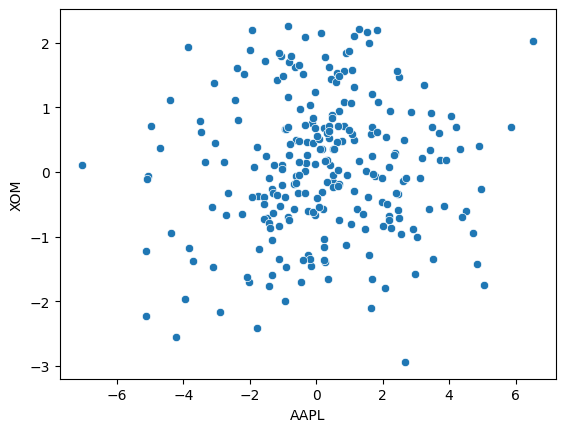

In [6]:
plt.figure()
sns.scatterplot(x=xx, y=yy)

Text(0.65, 0.97, 'y=0.07 + 0.03x')

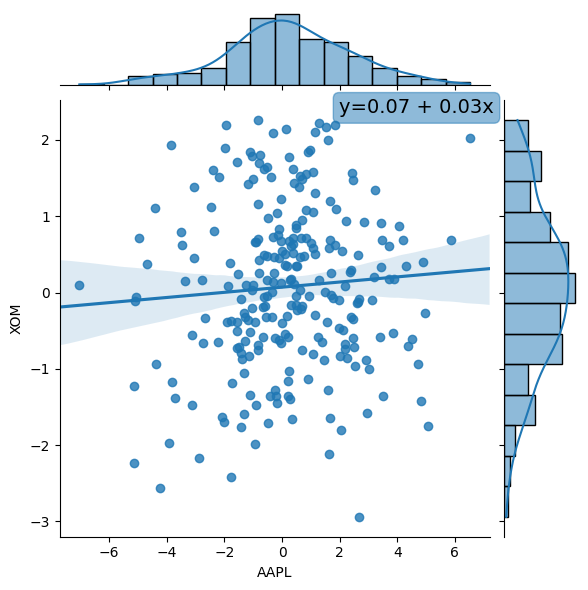

In [15]:
g = sns.jointplot(x=xx, y=yy, kind='reg', truncate=False)
# plot the regression equation
regr = linear_model.LinearRegression()
regr.fit(xx.values[1:].reshape(-1,1), yy.values[1:].reshape(-1,1))
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y=%0.02f + %0.02fx' % (regr.intercept_, regr.coef_[0])
g.ax_joint.text(0.65, 0.97, textstr, transform=g.ax_joint.transAxes, fontsize=14, bbox=props)

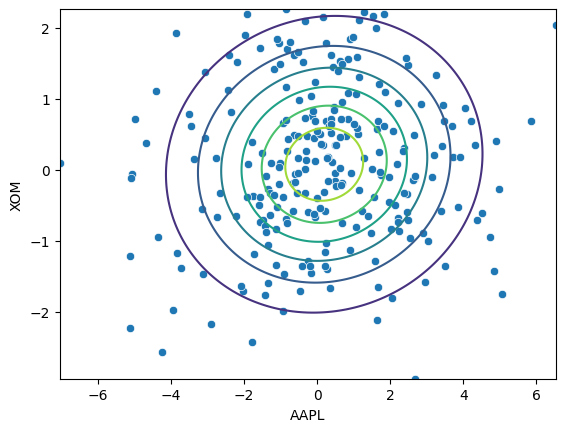

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure()

sns.scatterplot(x=xx, y=yy)

R = np.cov(np.vstack((xx.values[1:], yy.values[1:])))
rv = mvn([np.mean(xx), np.mean(yy)], R)

N = 200
X = np.linspace(np.min(xx), np.max(xx), N)
Y = np.linspace(np.min(yy), np.max(yy), N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
Z = rv.pdf(pos)

plt.contour(X, Y, Z)
plt.show()
plt.tight_layout()
# sns.kdeplot(, bw=0.25)

In [ ]:
X, y = toy_datasets.load_wine(return_X_y=True)
xx = X[:,6]  # flavanoids measurement
yy = X[:,9]  # color intensity measurement
plt.figure()
sns.scatterplot(x=xx, y=yy)

R = np.cov(np.vstack((xx, yy)))
rv = mvn([np.mean(xx), np.mean(yy)], R)

N = 200
X = np.linspace(np.min(xx), np.max(xx), N)
Y = np.linspace(np.min(yy), np.max(yy), N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
Z = rv.pdf(pos)

plt.contour(X, Y, Z)
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('Wine Characteristics')
plt.show()
plt.tight_layout()
